# Modelando o grafo das cidades
Executar a célula abaixo para executar as demais células

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Caminho para o arquivo CSV n
caminho_arquivo = 'dataset/saida.csv'  

# Carregar o CSV para um DataFrame do pandas
df = pd.read_csv(caminho_arquivo)

# Ler nomes das cidades
with open('59 cidades alemãs/nomes.txt', 'r', encoding='utf-8') as nomes_file:
    nomes = [linha.strip() for linha in nomes_file]

# Ler coordenadas das cidades
with open('59 cidades alemãs/coordenadas.txt', 'r') as coordenadas_file:
    coordenadas = [tuple(map(float, linha.strip().split())) for linha in coordenadas_file]

# Criar o dicionário de cidades
cidades = dict(zip(nomes, coordenadas))

# Criar grafo
G = nx.Graph()

# Adicionar nós com as coordenadas específicas
for cidade, coordenada in cidades.items():
    G.add_node(cidade, pos=coordenada)

# Adicionar arestas do dataframe
for index, row in df.iterrows():
    G.add_edge(row['Origem'], row['Destino'], Distancia=row['Distancia'])




# Plotando o grafo sem aplicar algoritmos 


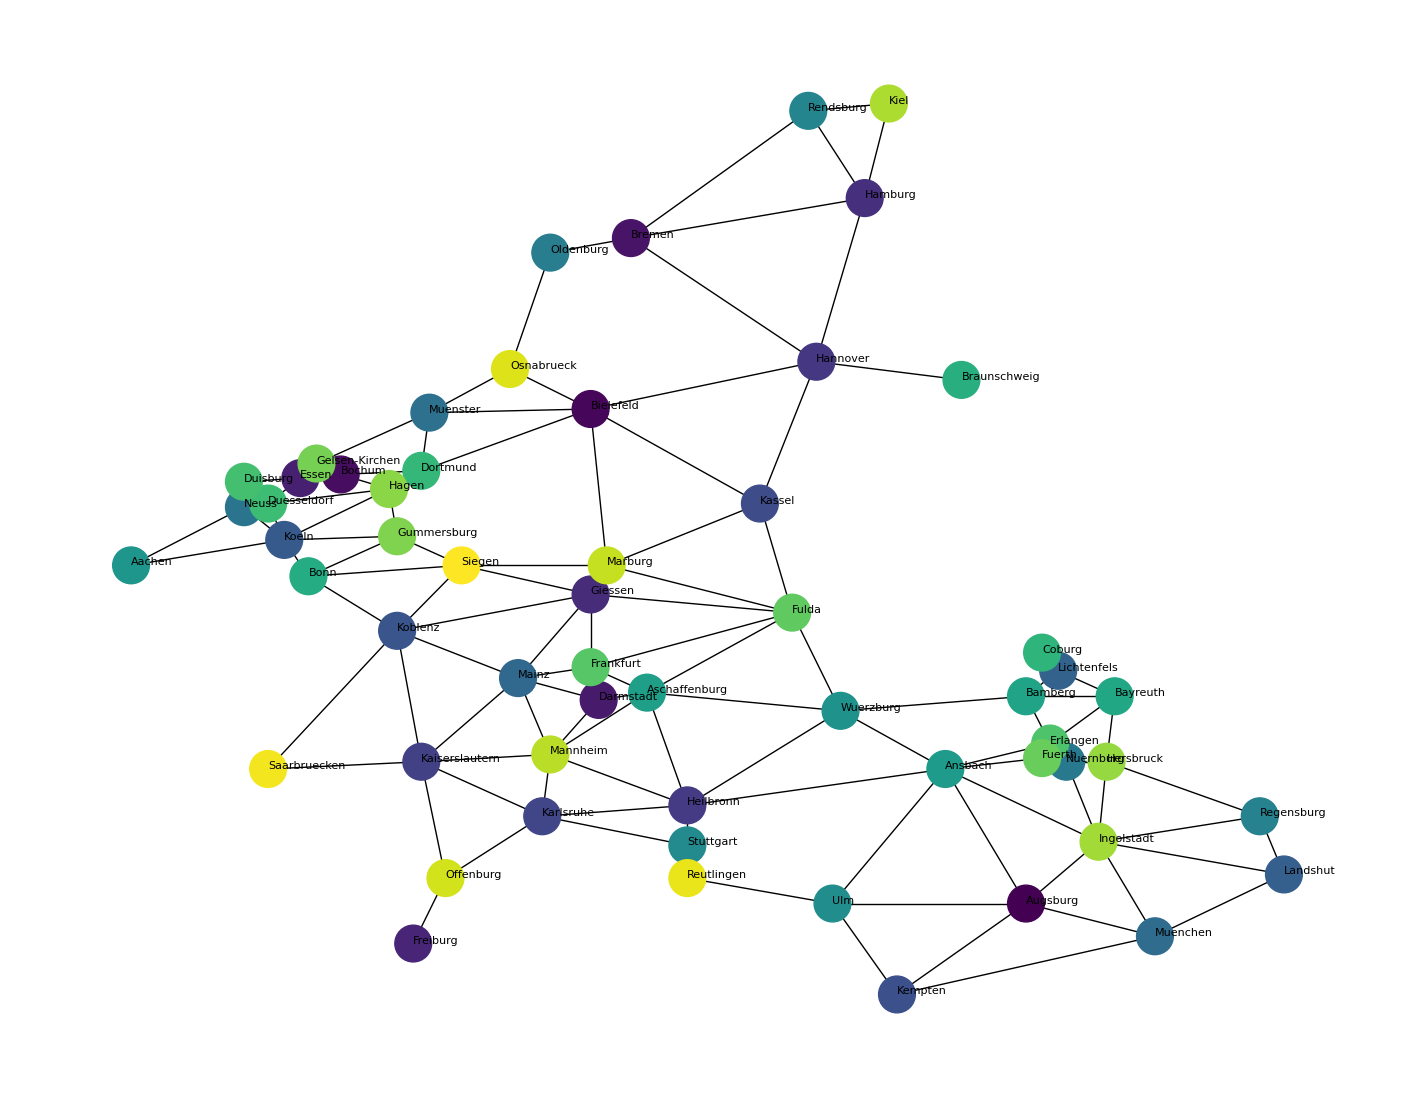

In [2]:
# Criar uma lista de cores para os nós (cores diferentes para cada cidade)
cores = np.arange(len(G.nodes))

# Criar a figura com tamanho específico
plt.figure(figsize=(18, 14))

# Desenhar nós com cores específicas
nx.draw_networkx_nodes(G, pos=nx.get_node_attributes(G, 'pos'), node_size=700, node_color=cores, cmap='viridis')

# Desenhar arestas
nx.draw_networkx_edges(G, pos=nx.get_node_attributes(G, 'pos'), width=1)

# Adicionar rótulos (nomes) para cada cidade
for cidade, coordenada in cidades.items():
    plt.text(coordenada[0], coordenada[1], cidade, fontsize=8)

# Adicionar rótulos aos eixos
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')

plt.axis('off')
plt.show()

# Arvore Geradora mínima:

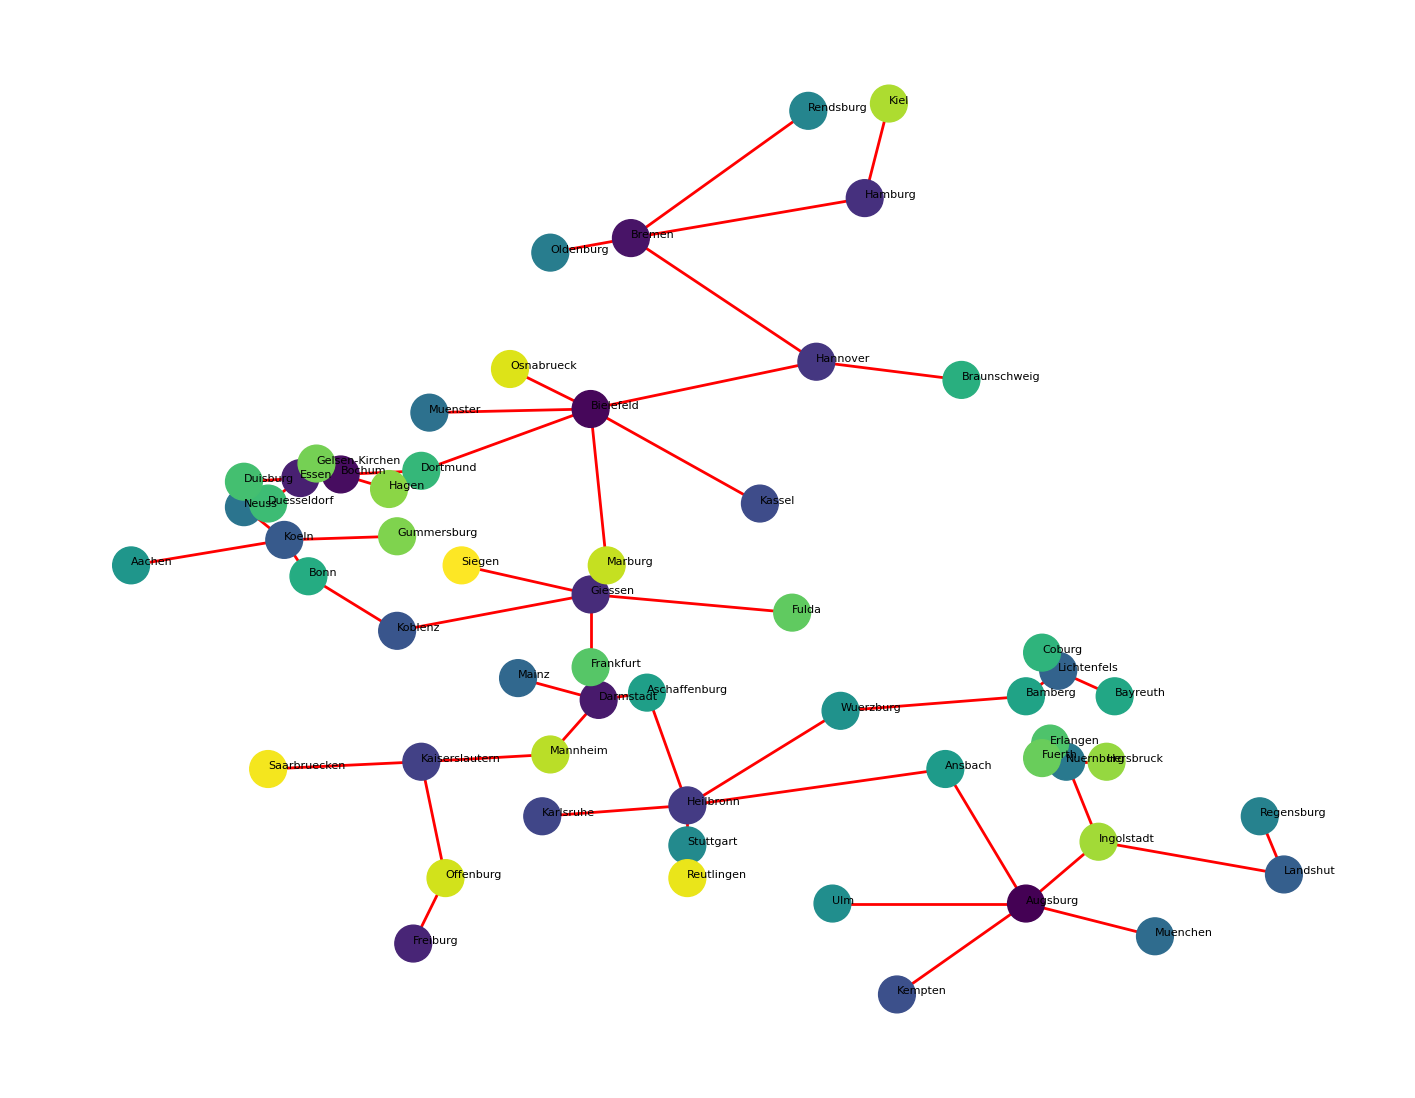

In [3]:

# Calcular a árvore geradora mínima
mst = nx.minimum_spanning_tree(G)

# Criar uma lista de cores para os nós (cores diferentes para cada cidade)
cores = np.arange(len(G.nodes))

# Criar a figura com tamanho específico
plt.figure(figsize=(18, 14))

# Desenhar nós da árvore geradora mínima com cores específicas
nx.draw_networkx_nodes(mst, pos=nx.get_node_attributes(G, 'pos'), node_size=700, node_color=cores, cmap='viridis')

# Desenhar arestas da árvore geradora mínima
nx.draw_networkx_edges(mst, pos=nx.get_node_attributes(G, 'pos'), width=2, edge_color='red')

# Adicionar rótulos (nomes) para cada cidade
for cidade, coordenada in cidades.items():
    plt.text(coordenada[0], coordenada[1], cidade, fontsize=8)

# Adicionar rótulos aos eixos
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')

plt.axis('off')
plt.show()

# Kruskal explicito

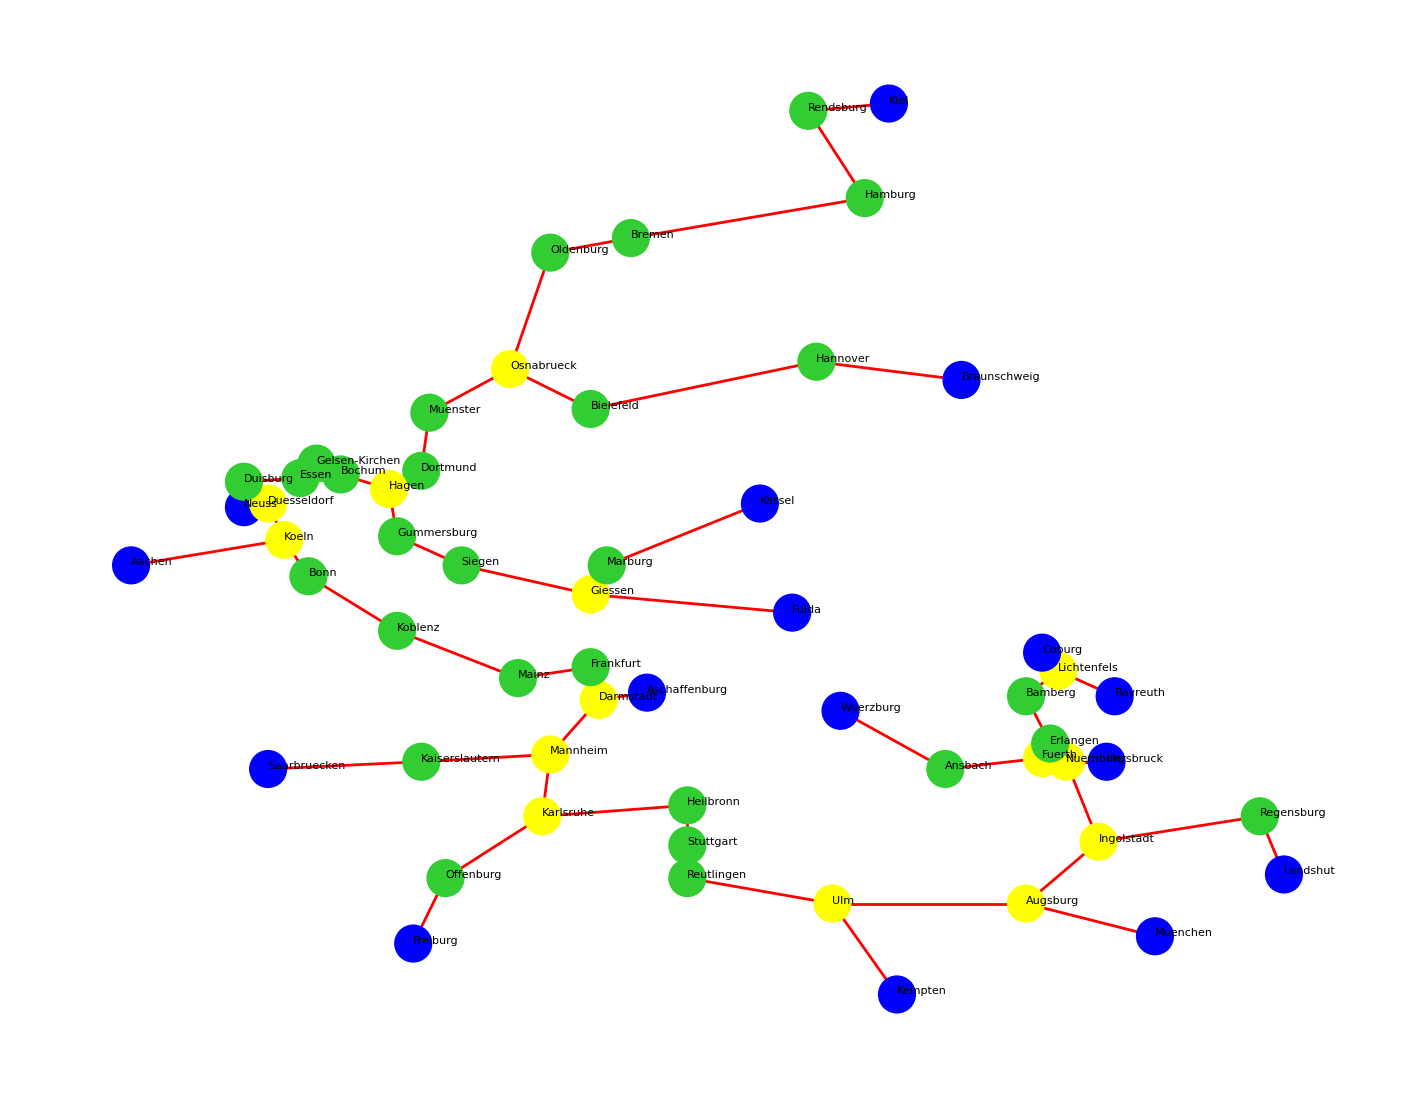

In [4]:
def kruskal(graph):
    # Inicializa uma floresta onde cada vértice está em uma árvore separada
    forest = {vertex: {vertex} for vertex in graph.nodes}

    # Ordena todas as arestas em ordem não decrescente de peso
    edges = sorted(graph.edges(data=True), key=lambda x: x[2]['Distancia'])

    # Inicializa a árvore geradora mínima
    mst = nx.Graph()

    for edge in edges:
        u, v, weight = edge
        tree_u = next((tree for tree in forest.values() if u in tree), None)
        tree_v = next((tree for tree in forest.values() if v in tree), None)

        # Verifica se as extremidades da aresta estão em árvores diferentes
        if tree_u != tree_v:
            mst.add_edge(u, v, weight=weight['Distancia'])

            # Une as árvores em uma única árvore
            # Une as árvores em uma única árvore
            tree_u.update(tree_v)
            for vertex in tree_v:
                forest[vertex] = tree_u         


    return mst



mst = kruskal(G)

# Calcular a quantidade de ligações para cada nó na árvore geradora mínima
node_degrees = dict(mst.degree())

# Mapear as cores de acordo com as regras especificadas
cores = []
for node in mst.nodes:
    if node_degrees[node] == 1:
        cores.append('blue')
    elif node_degrees[node] == 2:
        cores.append('limegreen')
    else:
        cores.append('yellow')

# Criar a figura com tamanho específico
plt.figure(figsize=(18, 14))

# Desenhar nós da árvore geradora mínima com cores específicas
nx.draw_networkx_nodes(mst, pos=nx.get_node_attributes(G, 'pos'), node_size=700, node_color=cores)

# Desenhar arestas da árvore geradora mínima
nx.draw_networkx_edges(mst, pos=nx.get_node_attributes(G, 'pos'), width=2, edge_color='red')

# Adicionar rótulos (nomes) para cada cidade
for cidade, coordenada in cidades.items():
    plt.text(coordenada[0], coordenada[1], cidade, fontsize=8)

# Adicionar rótulos aos eixos
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')

plt.axis('off')
plt.show()




# Usuando nx.minimum_spanning_tree

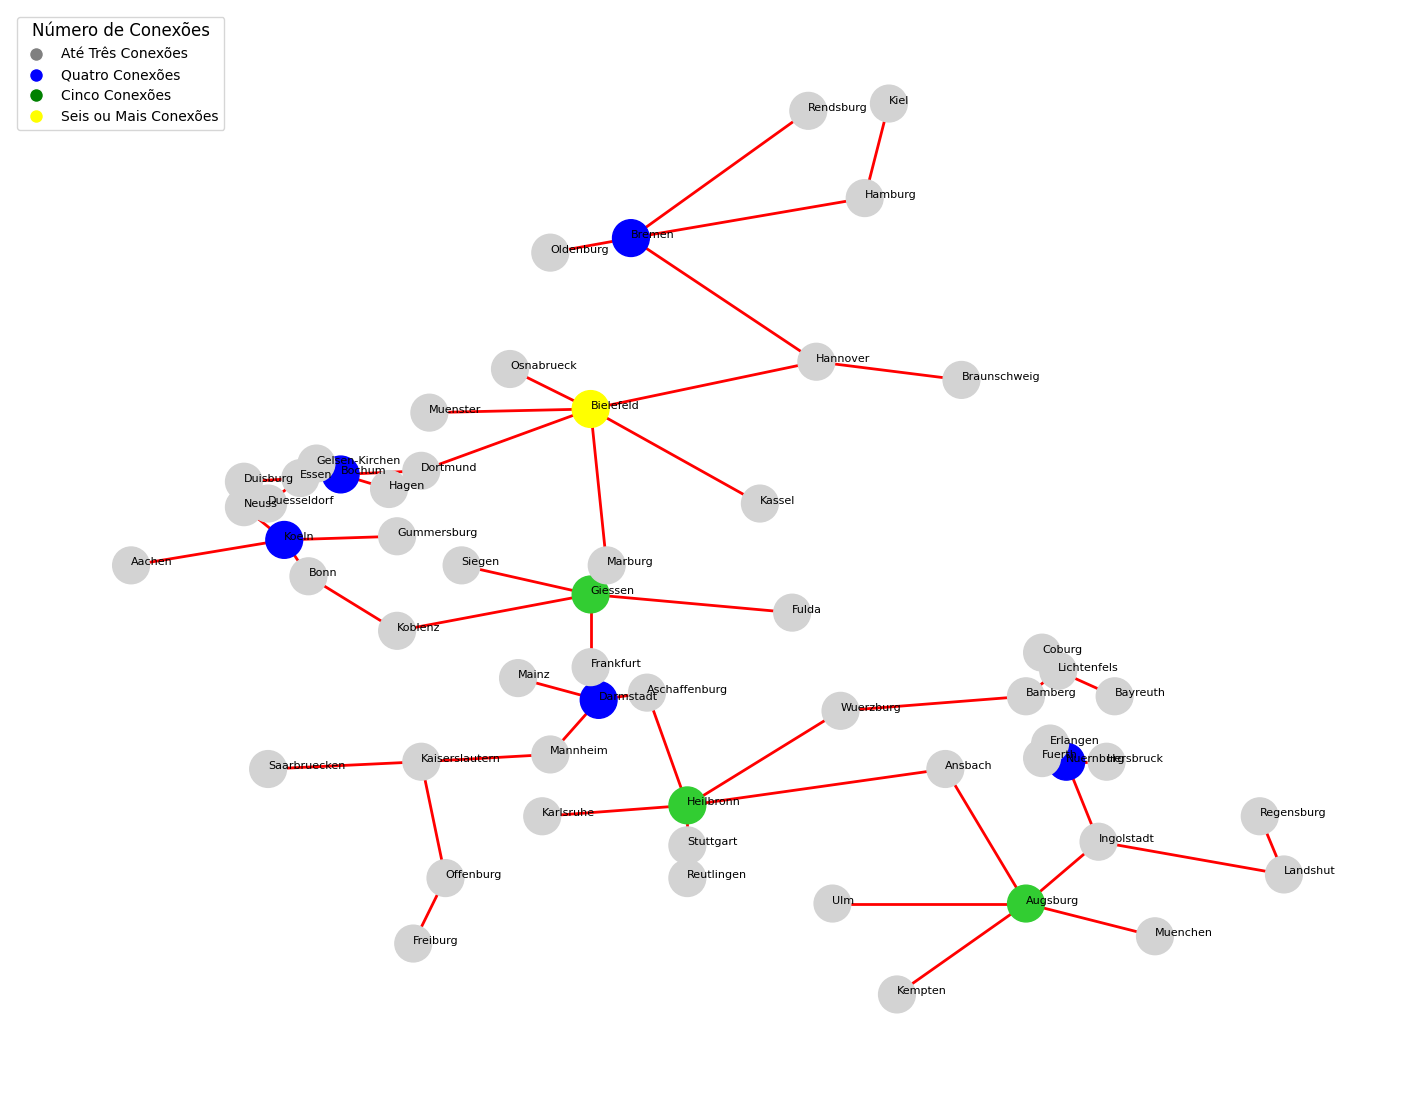

5
6
4
4
4
3
1
5
2
3
5
3
1
1
1
2
4
2
3
1
1
1
1
4
1
1
1
2
1
2
1
2
2
2
1
2
1
1
2
1
1
1
2
1
1
1
1
1
1
3
1
2
2
2
1
1
1
1
Distância total da árvore geradora mínima: 1052.0


In [5]:


# Calcular a árvore geradora mínima
mst = nx.minimum_spanning_tree(G)

# Criar uma lista de cores com base na quantidade de ligações de cada nó na árvore geradora mínima
num_conexoes = [mst.degree[node] for node in mst.nodes]
cores = []

# Definir cores com base no número de conexões
for num in num_conexoes:
    if num <= 3:
        cores.append('lightgray')
    elif num == 4:
        cores.append('blue')
    elif num == 5:
        cores.append('limegreen')
    else:
        cores.append('yellow')

# Criar a figura com tamanho específico
plt.figure(figsize=(18, 14))

# Desenhar nós da árvore geradora mínima com cores específicas
nx.draw_networkx_nodes(mst, pos=nx.get_node_attributes(G, 'pos'), node_size=700, node_color=cores)

# Desenhar arestas da árvore geradora mínima
nx.draw_networkx_edges(mst, pos=nx.get_node_attributes(G, 'pos'), width=2, edge_color='red')

# Adicionar rótulos (nomes) para cada cidade
for cidade, coordenada in cidades.items():
    plt.text(coordenada[0], coordenada[1], cidade, fontsize=8)

# Adicionar rótulos aos eixos
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')

# LEGENDA
legend_labels = {
    'Até Três Conexões': 'gray',
    'Quatro Conexões': 'blue',
    'Cinco Conexões': 'green',
    'Seis ou Mais Conexões': 'yellow'
}

legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in legend_labels.values()]

plt.legend(legend_handles, legend_labels.keys(), loc='upper left', title='Número de Conexões', title_fontsize='12', fontsize='10')

plt.axis('off')
plt.show()

for node in mst.nodes:
    print(mst.degree[node])

# Calcular a distância total da árvore geradora mínima
total_distance = sum([G[u][v]['Distancia'] for u, v in mst.edges()])

# Imprimir a distância total
print(f"Distância total da árvore geradora mínima: {total_distance}")

